In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

# metric function
def get_clf_eval(y_test, y_pred):
#     confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='micro')
    recall = recall_score(y_test, y_pred,average='micro')
    F1 = f1_score(y_test, y_pred,average='micro')
    
#     print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))

In [4]:
## 데이터 로드
train = pd.read_csv('../gdrive/MyDrive/train.csv')
test = pd.read_csv('../gdrive/MyDrive/test.csv')
submission = pd.read_csv('../gdrive/MyDrive/sample_submission.csv')

print(train.shape)
print(test.shape)
print(submission.shape)

(119888, 43)
(452746, 42)
(452746, 2)


In [ ]:
train.isnull().sum()

id            0
S_Angle       0
B_PRES        0
B_FLAG        0
LAT_ACCEL     0
LONG_ACCEL    0
YAW_RATE      0
E_Status      0
B_Depth       0
A_Depth       0
E_Speed       0
V_Speed       0
G_Status      0
WHL_SPD_FL    0
WHL_SPD_FR    0
WHL_SPD_RL    0
WHL_SPD_RR    0
BA_SoC        0
HL_High       0
HL_Low        0
DriveMode     0
F_Economy     0
HevMode       0
E_Col_Temp    0
Inhibit_D     0
Inhibit_N     0
Inhibit_P     0
Inhibit_R     0
Var_1         0
CT            0
MS            0
MC            0
X             0
Y             0
Z             0
BVP           0
EDA           0
HR            0
TEMP          0
Var_2         0
Var_3         0
Var_4         0
GPSMode       0
dtype: int64

In [ ]:
test.isnull().sum()

id            0
S_Angle       0
B_PRES        0
B_FLAG        0
LAT_ACCEL     0
LONG_ACCEL    0
YAW_RATE      0
E_Status      0
B_Depth       0
A_Depth       0
E_Speed       0
V_Speed       0
G_Status      0
WHL_SPD_FL    0
WHL_SPD_FR    0
WHL_SPD_RL    0
WHL_SPD_RR    0
BA_SoC        0
HL_High       0
HL_Low        0
DriveMode     0
F_Economy     0
HevMode       0
E_Col_Temp    0
Inhibit_D     0
Inhibit_N     0
Inhibit_P     0
Inhibit_R     0
Var_1         0
CT            0
MS            0
MC            0
X             0
Y             0
Z             0
BVP           0
EDA           0
HR            0
TEMP          0
Var_2         0
Var_3         0
Var_4         0
dtype: int64

### 데이터 분석

In [ ]:

## 데이터 set 만들기
X = train.drop(columns=['GPSMode'])
y = train['GPSMode']

In [ ]:
X.columns

Index(['id', 'S_Angle', 'B_PRES', 'B_FLAG', 'LAT_ACCEL', 'LONG_ACCEL',
       'YAW_RATE', 'E_Status', 'B_Depth', 'A_Depth', 'E_Speed', 'V_Speed',
       'G_Status', 'WHL_SPD_FL', 'WHL_SPD_FR', 'WHL_SPD_RL', 'WHL_SPD_RR',
       'BA_SoC', 'HL_High', 'HL_Low', 'DriveMode', 'F_Economy', 'HevMode',
       'E_Col_Temp', 'Inhibit_D', 'Inhibit_N', 'Inhibit_P', 'Inhibit_R',
       'Var_1', 'CT', 'MS', 'MC', 'X', 'Y', 'Z', 'BVP', 'EDA', 'HR', 'TEMP',
       'Var_2', 'Var_3', 'Var_4'],
      dtype='object')

### 데이터 EDA

In [5]:
train

,id,S_Angle,B_PRES,B_FLAG,LAT_ACCEL,LONG_ACCEL,YAW_RATE,E_Status,B_Depth,A_Depth,...,Y,Z,BVP,EDA,HR,TEMP,Var_2,Var_3,Var_4,GPSMode
0,1,8.500000,0.0,0,0.402857,-0.238571,1.280000,0,0,0,...,18.666667,-13.666667,-158.055,0.289273,83.5015,33.000,37.577511,126.887651,6,2
1,2,-106.980000,0.0,0,-2.171250,0.502500,-16.358750,0,0,18,...,7.500000,-0.500000,3.560,0.312594,87.1428,33.110,37.572471,126.888817,7,2
2,3,-10.200000,0.0,0,-0.482857,0.606786,-4.181071,0,0,30,...,15.000000,3.000000,22.460,0.191277,60.1490,30.750,37.582494,126.937084,8,2
3,4,-1.800000,0.0,0,-0.006250,-0.065000,-0.698750,0,0,0,...,-16.666667,55.333333,-58.440,0.375430,53.3865,34.090,37.589210,126.913211,7,2
4,5,1.200000,0.0,0,0.200000,0.480000,0.120000,1,0,36,...,-7.000000,48.666667,-46.380,0.207473,65.1733,30.810,37.577684,126.930549,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119883,119884,0.836364,0.0,0,0.120000,-0.180000,-0.190000,0,0,0,...,-11.000000,37.000000,29.130,0.198863,83.5370,30.450,37.602392,126.967622,0,6
119884,119885,1.912500,11.6,0,-0.128333,0.151667,0.026667,0,30,0,...,-18.000000,57.000000,48.440,0.331096,72.5345,33.500,37.573635,126.898411,7,2
119885,119886,3.300000,0.0,0,0.018333,0.015000,1.236667,1,0,0,...,-12.000000,38.666667,11.730,0.196300,82.3360,30.502,37.608104,126.978324,0,6
119886,119887,4.197500,4.2,0,0.240000,0.023750,0.073750,0,16,0,...,-5.750000,59.750000,1.940,0.244427,53.1476,32.810,37.565233,126.910056,8,2


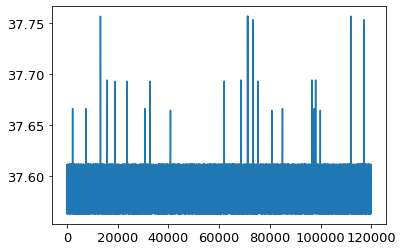

In [23]:
train['Var_2'].plot()

[Text(0.5, 1.0, 'Var_4')]

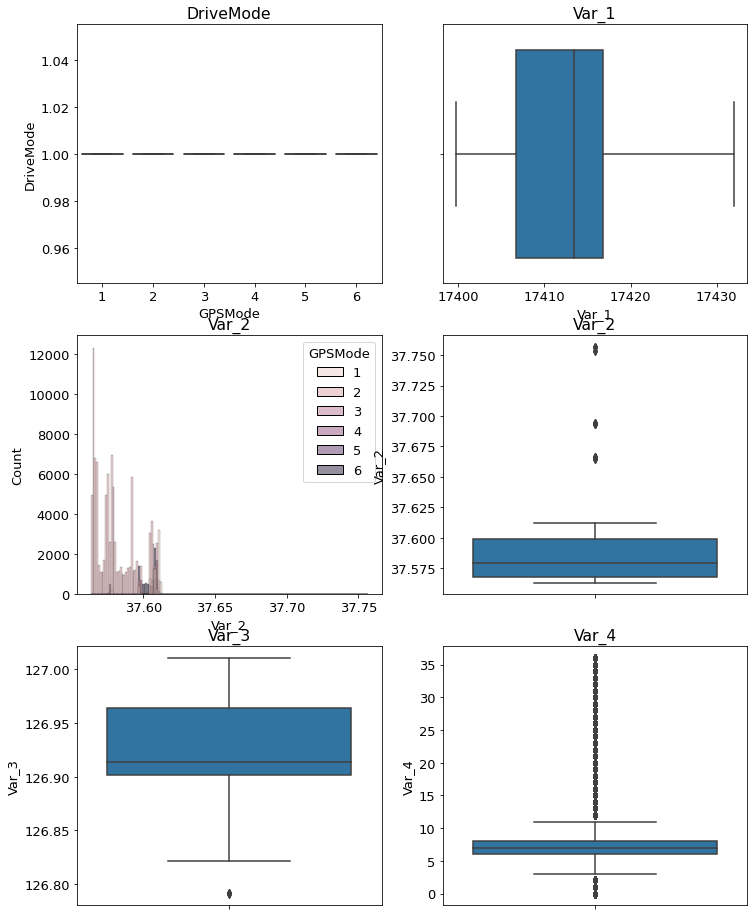

In [43]:
# # 1) 차속
# # 2) 기어봉위치
# # 3) 드라이브 모드
# # 4) 하이브리드 모드

## seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기
nrows=3
ncols=2
mpl.rc('font',size=13)
fig , axes = plt.subplots(nrows,ncols)
plt.tight_layout()
fig.set_size_inches(11,15)
plt.subplots_adjust(wspace=0.2, hspace=0.2)

axes[0,0]=sns.boxplot(x='GPSMode',y='DriveMode' ,data=train,ax=axes[0,0])
axes[0,0].set(
    title='DriveMode'
)

axes[0,1]=sns.boxplot(x='Var_1',data=train,ax=axes[0,1])
axes[0,1].set(
    title='Var_1'
)

axes[1,0]=sns.histplot(x='Var_2',data=train,ax=axes[1,0],hue='GPSMode')
axes[1,0].set(
    title='Var_2'
)

axes[1,1]=sns.boxplot(y='Var_2',data=train,ax=axes[1,1])
axes[1,1].set(
    title='Var_2'
)

axes[2,0]=sns.boxplot(y='Var_3',data=train,ax=axes[2,0])
axes[2,0].set(
    title='Var_3'
)

axes[2,1]=sns.boxplot(y='Var_4',data=train,ax=axes[2,1])
axes[2,1].set(
    title='Var_4'
)

In [32]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  
  return outlier_idx ,lowest ,highest

# 함수 사용해서 이상치 값 삭제
# oulier_idx = get_outlier(df=df, column='A', weight=1.5)
# df.drop(outlier_idx, axis=0, inplace=True)

In [33]:
## var_1
outlier_idx,lowest,highest = get_outlier(df=train, column='Var_1', weight=1.5)
print(lowest)
print(highest)

17391.550000000003
17431.949999999997


In [42]:
train.loc[train['Var_1']>17431.949999999997,'Var_1']=17431.949999999997

## 데이터 분리

In [ ]:
X_train , X_test , y_train ,y_test = train_test_split(X,y, test_size=0.2)

print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (95910, 42)
X_test (23978, 42)
y_train (95910,)
y_test (23978,)


### 상관관계 분석

### 이상치 확인

##scaling 적용  && one-hot encoding

In [ ]:
# X_temp=X.drop(columns=['B_FLAG', 'E_Status','G_Status','HL_High','HL_Low','Inhibit_P','Inhibit_R','Inhibit_N','Inhibit_D','DriveMode','HevMode'], axis=1)
# X_temp.columns

Index(['id', 'S_Angle', 'B_PRES', 'LAT_ACCEL', 'LONG_ACCEL', 'YAW_RATE',
       'B_Depth', 'A_Depth', 'E_Speed', 'V_Speed', 'WHL_SPD_FL', 'WHL_SPD_FR',
       'WHL_SPD_RL', 'WHL_SPD_RR', 'BA_SoC', 'F_Economy', 'E_Col_Temp',
       'Var_1', 'CT', 'MS', 'MC', 'X', 'Y', 'Z', 'BVP', 'EDA', 'HR', 'TEMP',
       'Var_2', 'Var_3', 'Var_4'],
      dtype='object')

In [ ]:
# X_train.columns

Index(['id', 'S_Angle', 'B_PRES', 'B_FLAG', 'LAT_ACCEL', 'LONG_ACCEL',
       'YAW_RATE', 'E_Status', 'B_Depth', 'A_Depth', 'E_Speed', 'V_Speed',
       'G_Status', 'WHL_SPD_FL', 'WHL_SPD_FR', 'WHL_SPD_RL', 'WHL_SPD_RR',
       'BA_SoC', 'HL_High', 'HL_Low', 'DriveMode', 'F_Economy', 'HevMode',
       'E_Col_Temp', 'Inhibit_D', 'Inhibit_N', 'Inhibit_P', 'Inhibit_R',
       'Var_1', 'CT', 'MS', 'MC', 'X', 'Y', 'Z', 'BVP', 'EDA', 'HR', 'TEMP',
       'Var_2', 'Var_3', 'Var_4'],
      dtype='object')

In [ ]:
## 이산형과 연속형 변수로 분류함
X_cat=[ 'B_FLAG', 'E_Status','G_Status','HL_High','HL_Low','Inhibit_P','Inhibit_R','Inhibit_N','Inhibit_D','DriveMode','HevMode']
X_num =['S_Angle', 'B_PRES', 'LAT_ACCEL', 'LONG_ACCEL', 'YAW_RATE',
       'B_Depth', 'A_Depth', 'E_Speed', 'V_Speed', 'WHL_SPD_FL', 'WHL_SPD_FR',
       'WHL_SPD_RL', 'WHL_SPD_RR', 'BA_SoC', 'F_Economy', 'E_Col_Temp',
       'Var_1', 'CT', 'MS', 'MC', 'X', 'Y', 'Z', 'BVP', 'EDA', 'HR', 'TEMP',
       'Var_2', 'Var_3', 'Var_4']

print("이산형",len(X_cat))
print("연속형",len(X_num))

이산형 11
연속형 30


In [ ]:
### scaling of X_train and X_test by X_train_scaler
def feature_engineering_scaling(scaler, X_train, X_test):
    # preprocessing.MinMaxScaler()
    # preprocessing.StandardScaler()
    # preprocessing.RobustScaler()
    # preprocessing.Normalizer()
    scaler = scaler
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                               index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                               index=X_test.index, columns=X_test.columns)
    return X_train_scaling, X_test_scaling

In [ ]:
## 연속현 변수는 scaling 적용함.
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

### Scaling ###
X_train_scaled_num, X_test_scaled_num = feature_engineering_scaling(preprocessing.MinMaxScaler(), X_train[X_num], X_test[X_num])

print("scaled, X_train",X_train_scaled_num.shape)
print("sacled, X_test",X_test_scaled_num.shape)

scaled, X_train (95910, 30)
sacled, X_test (23978, 30)


In [ ]:
# 'S_Angle', 'B_PRES', 'LAT_ACCEL', 'LONG_ACCEL', 'YAW_RATE', 'B_Depth',
#        'A_Depth', 'E_Speed', 'V_Speed', 'WHL_SPD_FL', 'WHL_SPD_FR',
#        'WHL_SPD_RL', 'WHL_SPD_RR', 'BA_SoC', 'F_Economy', 'E_Col_Temp',
#        'Var_1', 'CT', 'MS', 'MC', 'X', 'Y', 'Z', 'BVP', 'EDA', 'HR', 'TEMP',
#        'Var_2', 'Var_3', 'Var_4', 'B_FLAG_1', 'E_Status_1', 'E_Status_2',
#        'E_Status_3', 'E_Status_4', 'E_Status_5', 'G_Status_0', 'G_Status_1',
#        'G_Status_2', 'G_Status_3', 'G_Status_4', 'G_Status_5', 'G_Status_6',
#        'HL_High_1', 'HL_Low_1', 'Inhibit_P_1', 'Inhibit_R_1', 'Inhibit_N_1',
#        'Inhibit_D_1', 'HevMode_1', 'HevMode_2', 'HevMode_3', 'HevMode_4',
#        'HevMode_5', 'HevMode_6', 'HevMode_7', 'HevMode_8', 'HevMode_9',
#        'HevMode_10'

In [ ]:
## one-hot encoding
X_train_onehot_cat = pd.get_dummies(X_train[X_cat], columns=['B_FLAG', 'E_Status','G_Status','HL_High','HL_Low','Inhibit_P','Inhibit_R','Inhibit_N','Inhibit_D','DriveMode','HevMode'],drop_first=True)
X_test_onehot_cat = pd.get_dummies(X_test[X_cat], columns=['B_FLAG', 'E_Status','G_Status','HL_High','HL_Low','Inhibit_P','Inhibit_R','Inhibit_N','Inhibit_D','DriveMode','HevMode'],drop_first=True)


X_train_onehot_cat["G_Status_0"]=0
X_train_onehot_cat['G_Status_1']=0
X_train_onehot_cat['Inhibit_P_1']=0
X_train_onehot_cat['Inhibit_R_1']=0
X_train_onehot_cat['Inhibit_N_1']=0
X_train_onehot_cat['Inhibit_D_1']=0
X_train_onehot_cat['HevMode_1']=0
X_train_onehot_cat['HevMode_5']=0

X_test_onehot_cat["G_Status_0"]=0
X_test_onehot_cat['G_Status_1']=0
X_test_onehot_cat['Inhibit_P_1']=0
X_test_onehot_cat['Inhibit_R_1']=0
X_test_onehot_cat['Inhibit_N_1']=0
X_test_onehot_cat['Inhibit_D_1']=0
X_test_onehot_cat['HevMode_1']=0

print("one-hot, X_train",X_train_onehot_cat.shape)
print("one-hot, X_test",X_test_onehot_cat.shape)


## 여기서 없는 columns 'HevMode_5' 이므로 x_test에 채워줘야함


one-hot, X_train (95910, 29)
one-hot, X_test (23978, 29)


In [ ]:
# X_train_onehot_cat.columns

Index(['B_FLAG_1', 'E_Status_1', 'E_Status_2', 'E_Status_3', 'E_Status_4',
       'E_Status_5', 'G_Status_2', 'G_Status_3', 'G_Status_4', 'G_Status_5',
       'G_Status_6', 'HL_High_1', 'HL_Low_1', 'HevMode_2', 'HevMode_3',
       'HevMode_4', 'HevMode_6', 'HevMode_7', 'HevMode_8', 'HevMode_9',
       'HevMode_10', 'G_Status_0', 'G_Status_1', 'Inhibit_P_1', 'Inhibit_R_1',
       'Inhibit_N_1', 'Inhibit_D_1', 'HevMode_1'],
      dtype='object')

In [ ]:
#  X_test_onehot_cat.columns

Index(['B_FLAG_1', 'E_Status_1', 'E_Status_2', 'E_Status_3', 'E_Status_4',
       'E_Status_5', 'G_Status_2', 'G_Status_3', 'G_Status_4', 'G_Status_5',
       'G_Status_6', 'HL_High_1', 'HL_Low_1', 'HevMode_2', 'HevMode_3',
       'HevMode_4', 'HevMode_5', 'HevMode_6', 'HevMode_7', 'HevMode_8',
       'HevMode_9', 'HevMode_10', 'G_Status_0', 'G_Status_1', 'Inhibit_P_1',
       'Inhibit_R_1', 'Inhibit_N_1', 'Inhibit_D_1', 'HevMode_1'],
      dtype='object')

## 앞에서 나눠준 x 칼럼들 합치기

In [ ]:
X_train_scaled = pd.concat([X_train_scaled_num, X_train_onehot_cat] , axis=1)
X_test_scaled = pd.concat([X_test_scaled_num, X_test_onehot_cat] , axis=1)

print("X_train_scaled",X_train_scaled.shape)
print("X_test_scaled",X_test_scaled.shape)

X_train_scaled (95910, 59)
X_test_scaled (23978, 59)


# Model (Random Forest)

In [ ]:
# ## grid search
# from sklearn.model_selection import GridSearchCV

# params = { 'n_estimators' : [],
#            'max_depth' : [3,5],
#             }

# # RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# rf_clf = RandomForestClassifier(random_state = 0)
# grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 5)
# grid_cv.fit(X_train_scaled,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5], 'n_estimators': [10, 100]})

In [ ]:
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 5, 'n_estimators': 100}
최고 예측 정확도: 0.9832


# bset params

In [ ]:
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf_best = RandomForestClassifier(n_estimators = 1000 ,max_depth= 3)

rf_clf_best.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=3, n_estimators=1000)

In [ ]:
## 예측값확인
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

pred=rf_clf_best.predict(X_test_scaled)
get_clf_eval(y_test,pred)

In [ ]:
## feature importance

Variable_Importances = pd.DataFrame([rf_clf_best.feature_importances_], 
                                    columns=X_train_scaled.columns, 
                                    index=['importance']).T.sort_values(by=['importance'], ascending=False)
Variable_Importances.plot.bar(figsize=(12,6), fontsize=15)
plt.title('Variable Importances', fontsize=15)
plt.grid()
plt.show()

## MODEL( xgb )

In [ ]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함


xgb_model = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.01, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=5)
xgb_model.fit(X_train_scaled,y_train)


In [ ]:
## 예측값확인
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

pred=xgb_model.predict(X_test_scaled)
print("xgboost 모델")
get_clf_eval(y_test,pred)

# TEST 제출부분

### 최종 제출 test 데이터도 Feature 적용함

In [ ]:
## 총 Feautre 합쳐서 55개로 만들어함

In [ ]:
test = pd.read_csv('test.csv')

X_cat=[ 'B_FLAG', 'E_Status','G_Status','HL_High','HL_Low','Inhibit_P','Inhibit_R','Inhibit_N','Inhibit_D','DriveMode','HevMode']
X_num =['S_Angle', 'B_PRES', 'LAT_ACCEL', 'LONG_ACCEL', 'YAW_RATE',
       'B_Depth', 'A_Depth', 'E_Speed', 'V_Speed', 'WHL_SPD_FL', 'WHL_SPD_FR',
       'WHL_SPD_RL', 'WHL_SPD_RR', 'BA_SoC', 'F_Economy', 'E_Col_Temp',
       'Var_1', 'CT', 'MS', 'MC', 'X', 'Y', 'Z', 'BVP', 'EDA', 'HR', 'TEMP',
       'Var_2', 'Var_3', 'Var_4']



In [ ]:
## 연속형 scaling

scaler = MinMaxScaler()
scaler_fit = scaler.fit(test[X_num])
test_num = pd.DataFrame(scaler_fit.transform(test[X_num]), index=test[X_num].index, columns=test[X_num].columns)

print("scaling ",test_num.shape)

# ## one-hot encoding
test_cat = pd.get_dummies(test[X_cat], columns=['B_FLAG','E_Status','G_Status','HL_High','HL_Low','Inhibit_P','Inhibit_R','Inhibit_N','Inhibit_D','DriveMode','HevMode'],drop_first=True)

test_cat['HevMode_5']=0

print("one-hot, test_cat",test_cat.shape)

## 피처 합치기
test_scaled = pd.concat([test_num, test_cat] , axis=1)

print("test_scaled", test_scaled.shape)


scaling  (452746, 30)
one-hot, test_cat (452746, 29)
test_scaled (452746, 59)


In [ ]:
### 제출 형식 test 데이터로 예측하기
pred=rf_clf_best.predict(test_scaled)
print(pred.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- G_Status_0
- G_Status_1
- HevMode_1
- Inhibit_D_1
- Inhibit_N_1
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission['GPSMode'] = pred
# submission을 csv 파일로 다운 받습니다.
submission.to_csv('base_line.csv', index=False)